In [1]:
import pandas as pd
import numpy as np

In [2]:
dt = pd.read_csv('listings.csv')

In [6]:
selected_columns = [
    'price',
    'availability_365',
    'room_type',
    'review_scores_rating',
    'neighbourhood_group_cleansed'
]

df_unsupervised = dt[selected_columns].copy()

In [7]:
df_unsupervised['price'] = (
    df_unsupervised['price']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

In [8]:
df_unsupervised_cleaned = df_unsupervised.dropna()

In [9]:
df_encoded = pd.get_dummies(
    df_unsupervised_cleaned,
    columns=['room_type', 'neighbourhood_group_cleansed'],
    drop_first=True
)

In [10]:
df_encoded.head()

,price,availability_365,review_scores_rating,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_East Region,neighbourhood_group_cleansed_North Region,neighbourhood_group_cleansed_North-East Region,neighbourhood_group_cleansed_West Region
0,50.0,149,4.40,False,True,False,False,False,False,False
1,50.0,149,4.27,False,True,False,False,False,False,False
2,85.0,365,4.43,False,True,False,False,False,False,False
3,67.0,149,3.50,False,True,False,False,False,False,False
4,45.0,149,3.80,False,True,False,False,False,False,False


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

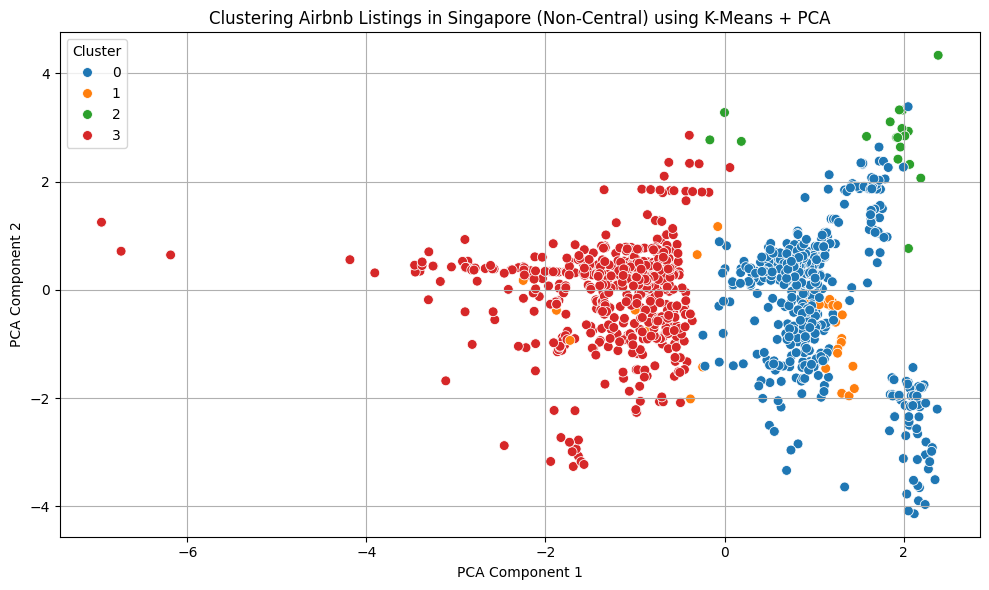

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10', s=50)
plt.title('Clustering Airbnb Listings in Singapore (Non-Central) using K-Means + PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
df_result = df_unsupervised_cleaned.copy()
df_result['cluster'] = clusters


In [18]:
cluster_region_counts = df_result.groupby(['cluster', 'neighbourhood_group_cleansed']).size().unstack().fillna(0)
print(cluster_region_counts)


neighbourhood_group_cleansed  Central Region  East Region  North Region  \
cluster                                                                   
0                                      566.0         73.0           0.0   
1                                        0.0          0.0           0.0   
2                                        0.0          0.0          19.0   
3                                      609.0          0.0           0.0   

neighbourhood_group_cleansed  North-East Region  West Region  
cluster                                                       
0                                           0.0         51.0  
1                                          32.0          0.0  
2                                           0.0          0.0  
3                                           0.0         15.0  


In [19]:
cluster_feature_means = df_result.groupby('cluster').mean(numeric_only=True)
print(cluster_feature_means)


              price  availability_365  review_scores_rating
cluster                                                    
0        117.833333        295.111594              4.558087
1        191.781250        280.406250              4.694375
2        118.631579        326.263158              4.526316
3        358.850962        297.358974              4.625705


In [20]:
cluster_feature_means = df_result.groupby('cluster').mean(numeric_only=True)
print(cluster_feature_means)


              price  availability_365  review_scores_rating
cluster                                                    
0        117.833333        295.111594              4.558087
1        191.781250        280.406250              4.694375
2        118.631579        326.263158              4.526316
3        358.850962        297.358974              4.625705


In [21]:
df_result.to_csv("unsupervised(elian).csv", index=False)
